In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

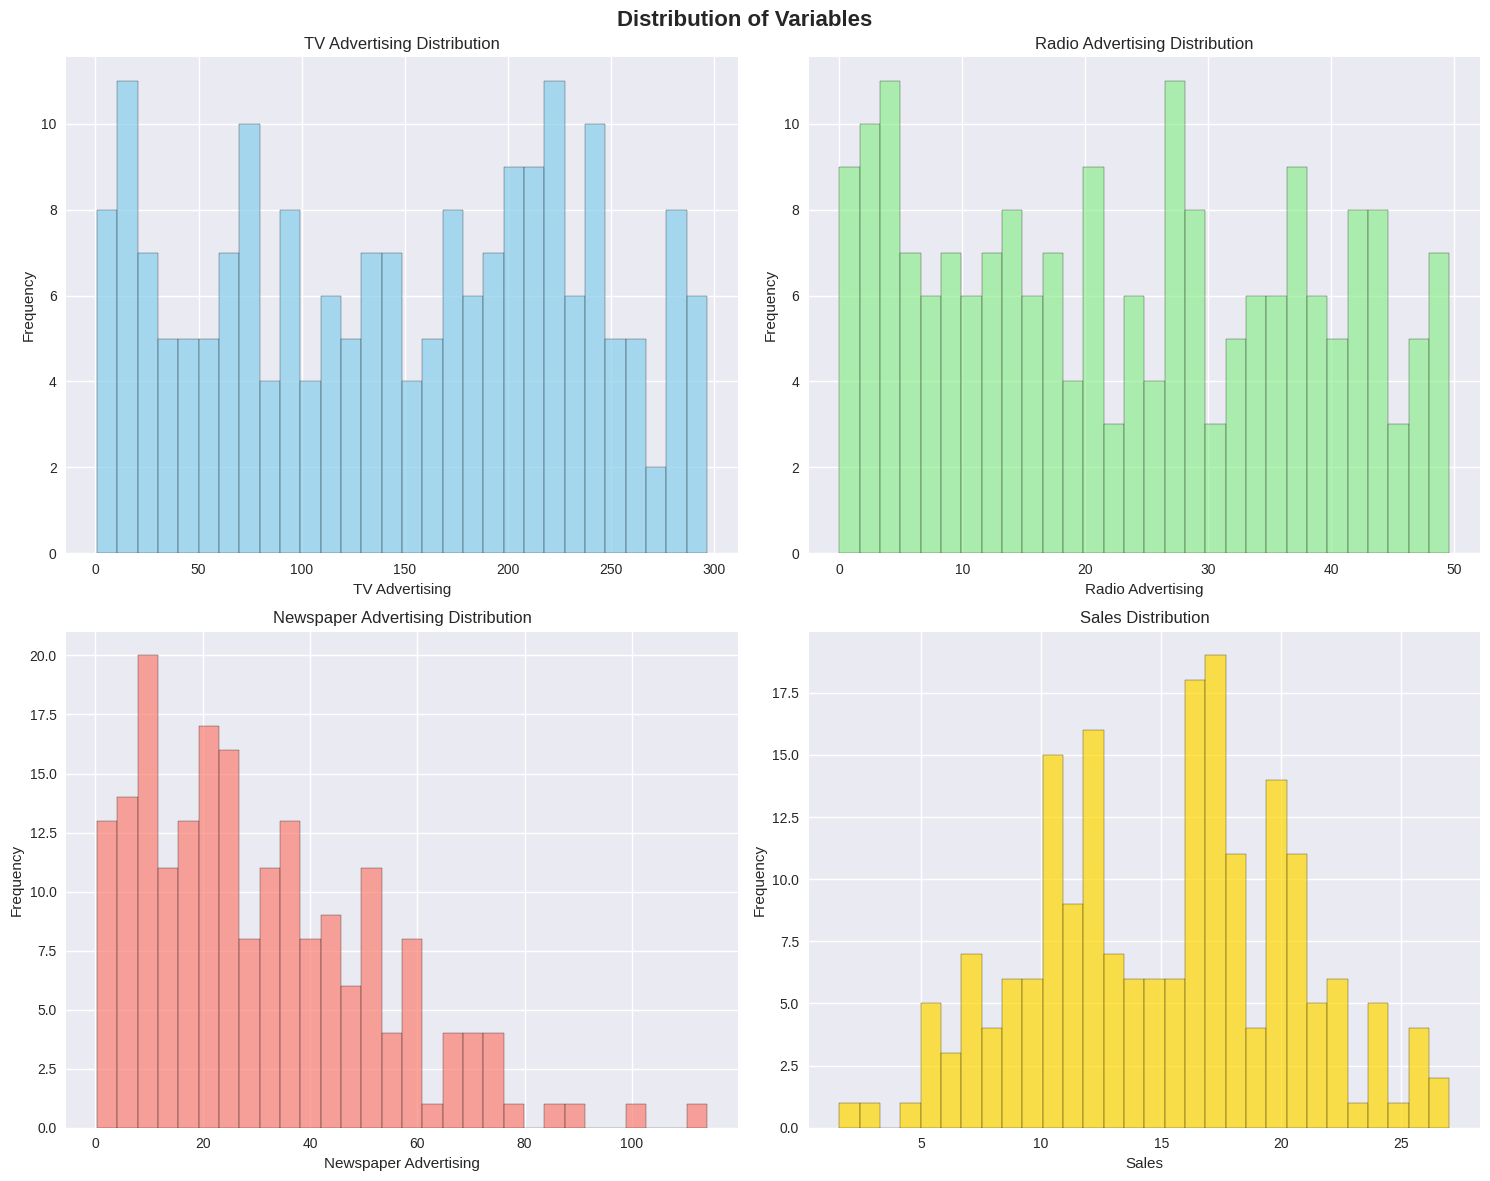

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Variables', fontsize=16, fontweight='bold')
axes[0, 0].hist(df['TV'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('TV Advertising Distribution')
axes[0, 0].set_xlabel('TV Advertising')
axes[0, 0].set_ylabel('Frequency')
axes[0, 1].hist(df['Radio'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Radio Advertising Distribution')
axes[0, 1].set_xlabel('Radio Advertising')
axes[0, 1].set_ylabel('Frequency')
axes[1, 0].hist(df['Newspaper'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 0].set_title('Newspaper Advertising Distribution')
axes[1, 0].set_xlabel('Newspaper Advertising')
axes[1, 0].set_ylabel('Frequency')
axes[1, 1].hist(df['Sales'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Sales Distribution')
axes[1, 1].set_xlabel('Sales')
axes[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


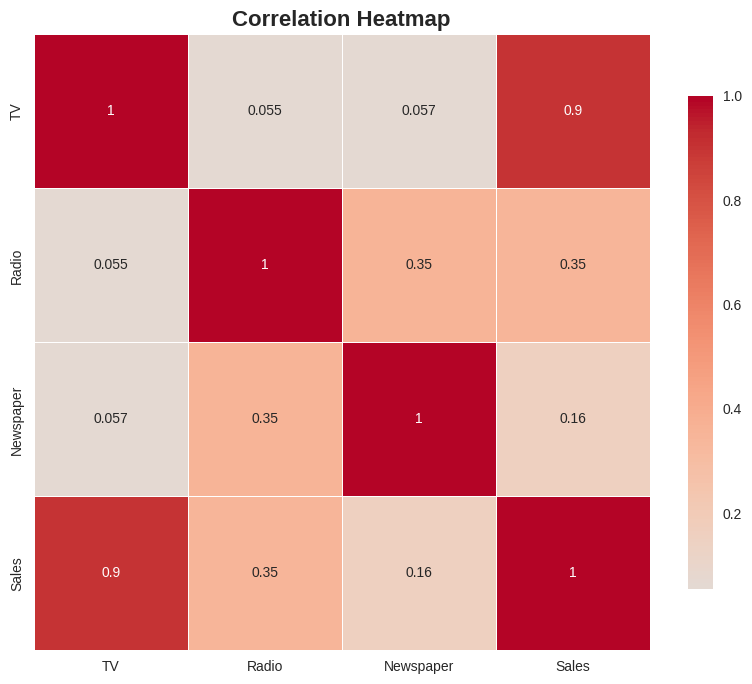

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
sales_corr = correlation_matrix['Sales'].sort_values(ascending=False)
for var, corr in sales_corr.items():
    if var != 'Sales':
        print(f"{var}: {corr:.4f}")

TV: 0.9012
Radio: 0.3496
Newspaper: 0.1580


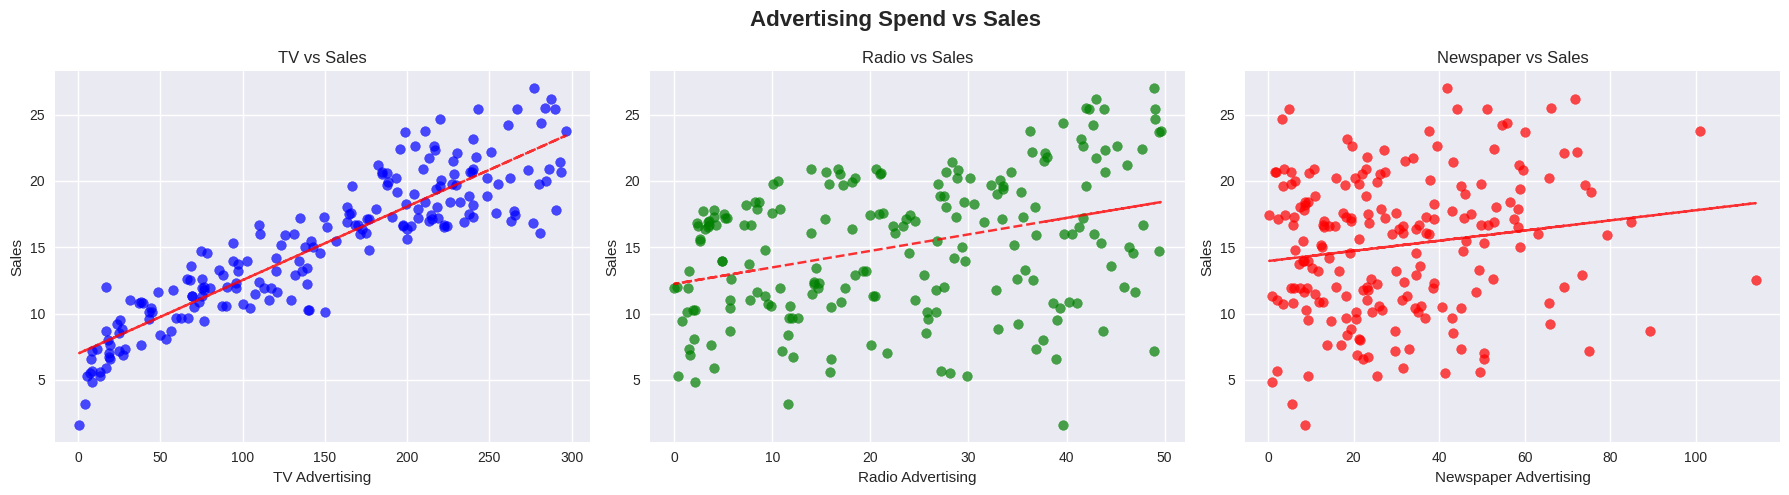

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Advertising Spend vs Sales', fontsize=16, fontweight='bold')

# TV vs Sales
axes[0].scatter(df['TV'], df['Sales'], alpha=0.7, color='blue')
axes[0].set_xlabel('TV Advertising')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')
z = np.polyfit(df['TV'], df['Sales'], 1)
p = np.poly1d(z)
axes[0].plot(df['TV'], p(df['TV']), "r--", alpha=0.8)

# Radio vs Sales
axes[1].scatter(df['Radio'], df['Sales'], alpha=0.7, color='green')
axes[1].set_xlabel('Radio Advertising')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')
z = np.polyfit(df['Radio'], df['Sales'], 1)
p = np.poly1d(z)
axes[1].plot(df['Radio'], p(df['Radio']), "r--", alpha=0.8)

# Newspaper vs Sales
axes[2].scatter(df['Newspaper'], df['Sales'], alpha=0.7, color='red')
axes[2].set_xlabel('Newspaper Advertising')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')
z = np.polyfit(df['Newspaper'], df['Sales'], 1)
p = np.poly1d(z)
axes[2].plot(df['Newspaper'], p(df['Newspaper']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


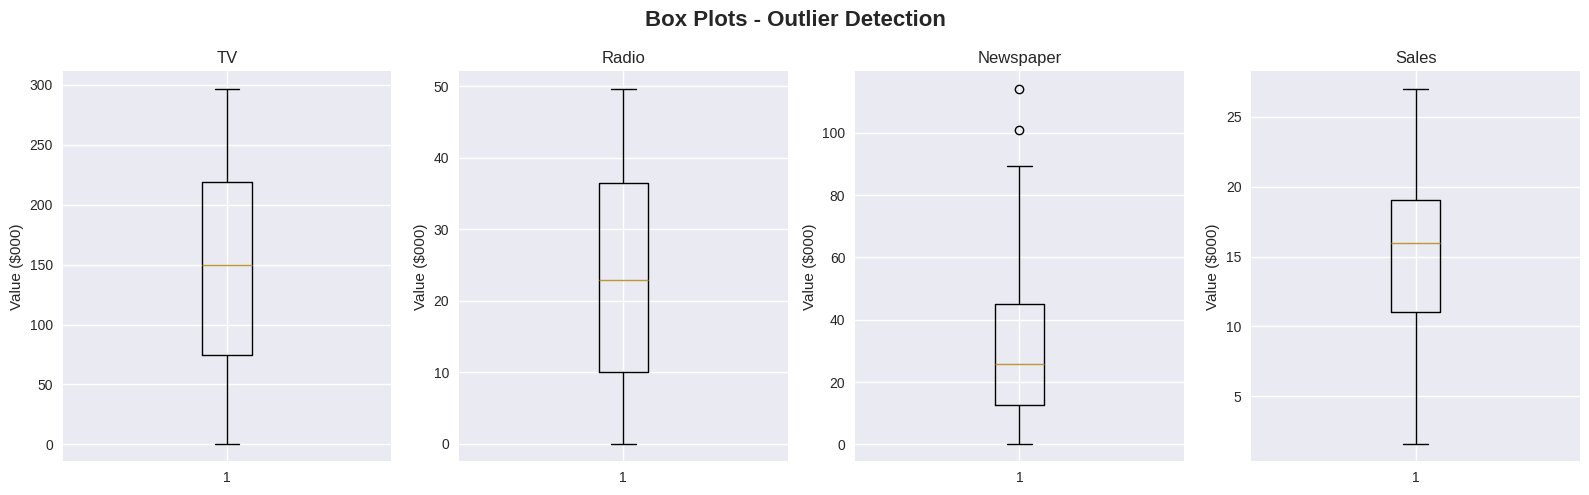

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Value ($000)')

plt.tight_layout()
plt.show()

In [ ]:
df_features = df.copy()

In [ ]:
df_features['Total_Advertising'] = df_features['TV'] + df_features['Radio'] + df_features['Newspaper']


In [ ]:
#  Advertising ratios
df_features['TV_Ratio'] = df_features['TV'] / df_features['Total_Advertising']
df_features['Radio_Ratio'] = df_features['Radio'] / df_features['Total_Advertising']
df_features['Newspaper_Ratio'] = df_features['Newspaper'] / df_features['Total_Advertising']


In [ ]:
#  Interaction features
df_features['TV_Radio_Interaction'] = df_features['TV'] * df_features['Radio']
df_features['TV_Newspaper_Interaction'] = df_features['TV'] * df_features['Newspaper']

#  Polynomial features
df_features['TV_Squared'] = df_features['TV'] ** 2
df_features['Radio_Squared'] = df_features['Radio'] ** 2

#  Log transformations (add small constant to avoid log(0))
df_features['TV_Log'] = np.log(df_features['TV'] + 1)
df_features['Radio_Log'] = np.log(df_features['Radio'] + 1)
df_features['Newspaper_Log'] = np.log(df_features['Newspaper'] + 1)

print(f"Original features: {df.shape[1]}")
print(f"After feature engineering: {df_features.shape[1]}")

# Select numerical features for modeling
numerical_features = ['TV', 'Radio', 'Newspaper', 'Total_Advertising',
                     'TV_Ratio', 'Radio_Ratio', 'Newspaper_Ratio',
                     'TV_Radio_Interaction', 'TV_Newspaper_Interaction',
                     'TV_Squared', 'Radio_Squared',
                     'TV_Log', 'Radio_Log', 'Newspaper_Log']

print(f"\nFeatures for modeling: {len(numerical_features)}")

Original features: 4
After feature engineering: 15

Features for modeling: 14


In [ ]:
X = df_features[numerical_features]
y = df_features['Sales']

print(f"Features selected for modeling: {X.shape[1]}")
print(f"Target variable shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Features selected for modeling: 14
Target variable shape: (200,)

Train set: (160, 14)
Test set: (40, 14)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed!")

Data preparation completed!


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, gamma='scale')
}

# Train models and store results
model_results = {}
trained_models = {}

print("-" * 70)
print(f"{'Model':<25} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 70)

for name, model in models.items():
    try:
        if name == 'Support Vector Regression':
            # Use scaled features for SVR
            model.fit(X_train_scaled, y_train)
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
        else:
            # Use original features for Linear Regression and Random Forest
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae = mean_absolute_error(y_test, y_pred_test)

        # Store results
        model_results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'rmse': rmse,
            'mae': mae,
            'predictions': y_pred_test,
            'model': model
        }
        trained_models[name] = model

        print(f"{name:<25} {train_r2:<10.4f} {test_r2:<10.4f} {rmse:<10.4f} {mae:<10.4f}")

    except Exception as e:
        print(f"Error training {name}: {str(e)}")
        continue

print("-" * 70)


----------------------------------------------------------------------
Model                     Train R²   Test R²    RMSE       MAE       
----------------------------------------------------------------------
Linear Regression         0.9380     0.9500     1.2431     0.9042    
Random Forest             0.9930     0.9524     1.2125     0.8359    
Support Vector Regression 0.8527     0.8706     1.9995     1.4124    
----------------------------------------------------------------------


In [ ]:
print("-" * 70)
print(f"{'Model':<25} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 70)

final_results = {}
for name, model in tuned_models.items():
    try:
        # Make predictions
        if name == 'Support Vector Regression':
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
        else:
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae = mean_absolute_error(y_test, y_pred_test)

        final_results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'rmse': rmse,
            'mae': mae,
            'predictions': y_pred_test
        }

        print(f"{name:<25} {train_r2:<10.4f} {test_r2:<10.4f} {rmse:<10.4f} {mae:<10.4f}")

    except Exception as e:
        print(f"{name:<25} Error in evaluation: {str(e)}")

print("-" * 70)

# Find best model
if final_results:
    best_model_name = max(final_results.keys(), key=lambda x: final_results[x]['test_r2'])
    best_model = tuned_models[best_model_name]
    print(f"\n BEST MODEL: {best_model_name}")
    print(f"Test R² Score: {final_results[best_model_name]['test_r2']:.4f}")
    print(f"RMSE: {final_results[best_model_name]['rmse']:.2f}k")


----------------------------------------------------------------------
Model                     Train R²   Test R²    RMSE       MAE       
----------------------------------------------------------------------
Random Forest             0.9930     0.9524     1.2125     0.8359    
Support Vector Regression 0.8527     0.8706     1.9995     1.4124    
Linear Regression         0.9380     0.9500     1.2431     0.9042    
----------------------------------------------------------------------

 BEST MODEL: Random Forest
Test R² Score: 0.9524
RMSE: 1.21k



 RANDOM FOREST FEATURE IMPORTANCE ===
                     feature  importance
3          Total_Advertising    0.696953
7       TV_Radio_Interaction    0.154184
9                 TV_Squared    0.054144
0                         TV    0.032409
11                    TV_Log    0.028929
8   TV_Newspaper_Interaction    0.006073
4                   TV_Ratio    0.005226
6            Newspaper_Ratio    0.005218
5                Radio_Ratio    0.003633
1                      Radio    0.002823
12                 Radio_Log    0.002716
13             Newspaper_Log    0.002609
2                  Newspaper    0.002605
10             Radio_Squared    0.002477


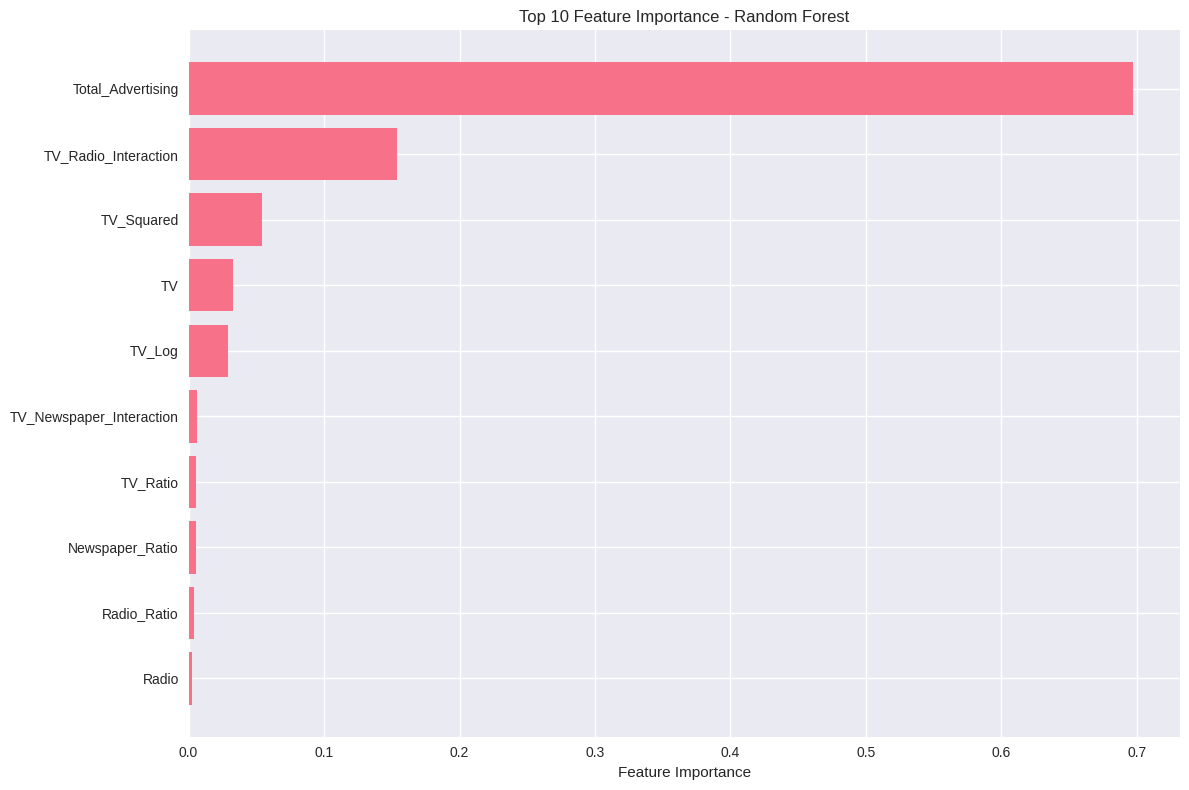

In [ ]:

if 'Random Forest' in tuned_models:
    rf_model = tuned_models['Random Forest']

    if hasattr(rf_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\n RANDOM FOREST FEATURE IMPORTANCE")
        print(feature_importance)

        # Plot feature importance
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(10)  # Show top 10 features
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title('Top 10 Feature Importance - Random Forest')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

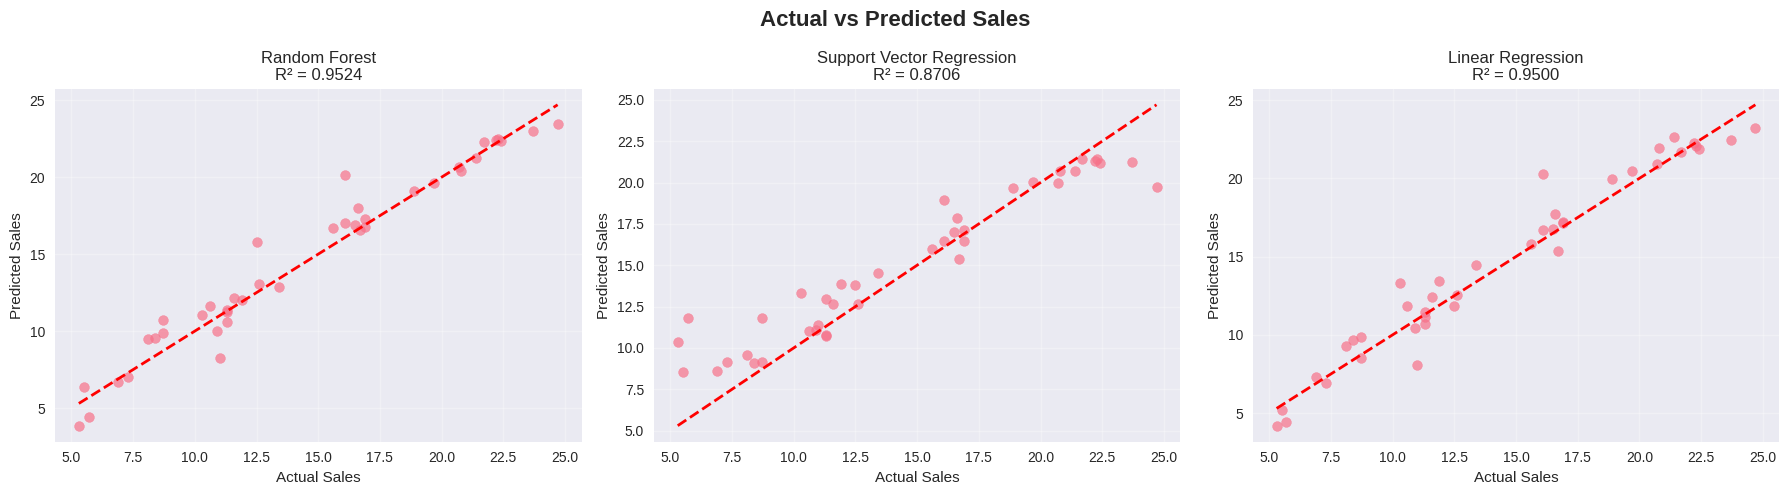

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Actual vs Predicted Sales', fontsize=16, fontweight='bold')

for i, (name, results) in enumerate(final_results.items()):
    axes[i].scatter(y_test, results['predictions'], alpha=0.7, s=50)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual Sales')
    axes[i].set_ylabel('Predicted Sales')
    axes[i].set_title(f'{name}\nR² = {results["test_r2"]:.4f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
test_scenarios = [
    {"TV": 100, "Radio": 20, "Newspaper": 30, "description": "Moderate spend"},
    {"TV": 200, "Radio": 40, "Newspaper": 50, "description": "High spend"},
    {"TV": 50, "Radio": 10, "Newspaper": 15, "description": "Low spend"}
]

for scenario in test_scenarios:
    print(f"\n📊 {scenario['description']}:")
    print(f"   Input: TV=${scenario['TV']}k, Radio=${scenario['Radio']}k, Newspaper=${scenario['Newspaper']}k")


📊 Moderate spend:
   Input: TV=$100k, Radio=$20k, Newspaper=$30k

📊 High spend:
   Input: TV=$200k, Radio=$40k, Newspaper=$50k

📊 Low spend:
   Input: TV=$50k, Radio=$10k, Newspaper=$15k
